In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, average, weighted, centroid, complete, ward, cophenet
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("datacleaned.csv")
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,sample_id,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,sample_0,3
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,sample_1,2
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,sample_2,3
3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.000000,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,sample_3,3
4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,0.000000,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,sample_4,0


In [3]:
df1 = df.copy()
df1.set_index('sample_id', inplace = True)
labels = df1['Class']
df1.drop(columns = ['Class'], inplace = True)

In [4]:
df1

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_id,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,0.0,0.0,0.000000,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,7.320331,0.000000,0.0,0.0,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,0.0,0.0,7.448149,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693


In [5]:
df_genes = df1.T.copy()
df_samples = df1.copy()

In [6]:
df_genes_norm = (df_genes - df_genes.mean())/df_genes.std()
df_samples_norm = (df_samples - df_samples.mean())/df_samples.std()

# Genes - based Clustering



### The problem of finding optimal number of clusters. 

Heatmaps offer a visual representation of underlying clusters present in the data in a hierarchical manner, however a more analytic method is needed to identify cluster which individual gene belongs to. Here we will adopt the strategy of calculating the correlation between cophenetic distance and pairwise distances, to choose which linkage is most suitable for the current problem. Two types of distances are considered : Euclidean and Pearson Correlation. After which, various compatible linkages are calculated based on these distances. Once the linkage matrix is obtained, cophenetic distance can be obtained using scipy. Then we calculate the correlation between this cophenetic array and pairwise distances. Out of all the combinations, 3 combinations which give the highest correlation values are chosen. Then for each of these combinations, cluster labels are obtained for all genes for various number of clusters. The cluster quality is measured according to 2 indices namely : Davies-Bouldin Score and Silhouette Score. After analyzing the graphs, optimum number of clusters, as well as most suitable linkage are obtained. Once this is obtained, genes can be categorized as one of the n-types, n being the optimal number of clusters. **The genes in each group are genes who expression value are similar across all samples.** 

In [7]:
from sklearn.metrics import silhouette_score,silhouette_samples, davies_bouldin_score

## Hierarchical clustering 

In [8]:
#Load linkages from week 1
gene_linkage_ward = np.load("gene_linkage_ward.npy")
gene_linkage_complete_pear = np.load("gene_linkage_complete_pear.npy")

In [ ]:
sample_linkage_ward = np.load("sample_linkage.npy")
sample_linkage_complete_pear = np.load("sample_linkage_pearson.npy")

In [9]:
try:
    genes_dist_euclidean = np.load("genes_distance_euclidean.npy")
except:
    genes_dist_euclidean = pdist(df_genes_norm, metric='euclidean')
    np.save("genes_distance_euclidean.npy", genes_dist_euclidean)

try:
    genes_dist_pearson = np.load("genes_distance_correlation.npy")
except:
    genes_dist_pearson = pdist(df_genes_norm, metric='correlation')
    np.save("genes_distance_correlation.npy", genes_dist_pearson)
    

In [10]:
try:
    gene_linkage_complete = np.load("gene_linkage_complete.npy")
except:
    gene_linkage_complete = complete(genes_dist_euclidean)
    np.save("gene_linkage_complete.npy", gene_linkage_complete)
     

try:
    gene_linkage_upgma = np.load("gene_linkage_upgma.npy")
except:
    gene_linkage_upgma = average(genes_dist_euclidean)
    np.save("gene_linkage_upgma.npy", gene_linkage_upgma)

try:
    gene_linkage_upgma_pear = np.load("gene_linkage_upgma_pear.npy")
except:
    gene_linkage_upgma_pear = average(genes_dist_pearson)
    np.save("gene_linkage_upgma_pear.npy", gene_linkage_upgma_pear)
    
try:
    gene_linkage_wpgma = np.load("gene_linkage_wpgma.npy")
except:
    gene_linkage_wpgma = weighted(genes_dist_euclidean)
    np.save("gene_linkage_wpgma.npy",gene_linkage_wpgma)
    
try:
    gene_linkage_wpgma_pear = np.load("gene_linkage_wpgma_pear.npy")
except:
    gene_linkage_wpgma_pear = weighted(genes_dist_pearson)
    np.save("gene_linkage_wpgma_pear.npy", gene_linkage_wpgma_pear)
    
try:
    gene_linkage_centroid = np.load("gene_linkage_centroid.npy")
except:
    gene_linkage_centroid = centroid(genes_dist_euclidean)
    np.save("gene_linkage_centroid.npy", gene_linkage_centroid)
    


In [11]:
try:
    coph_dist1 = np.load("cophenet_genes_complete.npy")
except:
    coph_dist1 = cophenet(gene_linkage_complete)
    np.save("cophenet_genes_complete.npy", coph_dist1)
    
try:
    coph_dist2 = np.load("cophenet_genes_ward.npy")
except:
    coph_dist2 = cophenet(gene_linkage_ward)
    np.save("cophenet_genes_ward.npy", coph_dist2)
    
try:
    coph_dist3 = np.load("cophenet_genes_upgma.npy")
except:
    coph_dist3 = cophenet(gene_linkage_upgma)
    np.save("cophenet_genes_upgma.npy", coph_dist3)       
    
try:
    coph_dist4 = np.load("cophenet_genes_wpgma.npy")
except:
    coph_dist4 = cophenet(gene_linkage_wpgma)
    np.save("cophenet_genes_wpgma.npy", coph_dist4)    
       
try:
    coph_dist5 = np.load("cophenet_genes_centroid.npy")
except:
    coph_dist5 = cophenet(gene_linkage_centroid)
    np.save("cophenet_genes_centroid.npy", coph_dist5)     
    
try:
    coph_dist6 = np.load("cophenet_genes_complete_pear.npy")
except:
    coph_dist6 = cophenet(gene_linkage_complete_pear)
    np.save("cophenet_genes_complete_pear.npy", coph_dist6)
    
try:
    coph_dist7 = np.load("cophenet_genes_upgma_pear.npy")
except:
    coph_dist7 = cophenet(gene_linkage_upgma_pear)
    np.save("cophenet_genes_upgma_pear.npy", coph_dist7)
         
try:
    coph_dist8 = np.load("cophenet_genes_wpgma_pear.npy")
except:
    coph_dist8 = cophenet(gene_linkage_wpgma_pear)
    np.save("cophenet_genes_wpgma_pear.npy", coph_dist8)

In [12]:
print("Distance: Euclidean, Linkage: Complete")
corr1 = pearsonr(coph_dist1, genes_dist_euclidean)
print(f"Correlation = {corr1}")

print("Distance: Euclidean, Linkage: Ward")
corr2 = pearsonr(coph_dist2, genes_dist_euclidean)
print(f"Correlation = {corr2}")

print("Distance: Euclidean, Linkage: UPGMA")
corr3 = pearsonr(coph_dist3, genes_dist_euclidean)
print(f"Correlation = {corr3}")

print("Distance: Euclidean, Linkage: WPGMA")
corr4 = pearsonr(coph_dist4, genes_dist_euclidean)
print(f"Correlation = {corr4}")

print("Distance: Euclidean, Linkage: Centroid")
corr5 = pearsonr(coph_dist5, genes_dist_euclidean)
print(f"Correlation = {corr5}")

print("Distance: Correlation, Linkage: Complete")
corr6 = pearsonr(coph_dist6, genes_dist_pearson)
print(f"Correlation = {corr6}")

print("Distance: Correlation, Linkage: UPGMA")
corr7 = pearsonr(coph_dist7, genes_dist_pearson)
print(f"Correlation = {corr7}")

print("Distance: Correlation, Linkage: WPGMA")
corr8 = pearsonr(coph_dist8, genes_dist_pearson)
print(f"Correlation = {corr8}")


Distance: Euclidean, Linkage: Complete
Correlation = (0.5567390823972649, 0.0)
Distance: Euclidean, Linkage: Ward
Correlation = (0.7205914196944003, 0.0)
Distance: Euclidean, Linkage: UPGMA
Correlation = (0.8153947817970775, 0.0)
Distance: Euclidean, Linkage: WPGMA
Correlation = (0.4818478004487592, 0.0)
Distance: Euclidean, Linkage: Centroid
Correlation = (0.8309114913881417, 0.0)
Distance: Correlation, Linkage: Complete
Correlation = (0.05205307146618319, 0.0)
Distance: Correlation, Linkage: UPGMA
Correlation = (0.08203214907280829, 0.0)
Distance: Correlation, Linkage: WPGMA
Correlation = (0.08203214907280829, 0.0)


**It looks like Centroid Linkage with euclidean distance, UPGMA linkage with euclidean distance and Ward Linkage wit euclidean distance are the best clusters** 
    
    

In [15]:
genehclusters_ward = [fcluster(gene_linkage_ward,t=i,criterion='maxclust') for i in range(2,11)] 
genehclusters_upgma = [fcluster(gene_linkage_upgma,t=i,criterion='maxclust') for i in range(2,11)]
genehclusters_centroid = [fcluster(gene_linkage_centroid,t=i,criterion='maxclust') for i in range(2,11)]

In [16]:
silhouette_scores_ward = [(n,silhouette_score(df_genes_norm,preds)) for n, preds in 
                          zip(range(2,11), genehclusters_ward)]
silhouette_scores_upgma = [(n,silhouette_score(df_genes_norm,preds)) for n, preds in 
                           zip(range(2,11), genehclusters_upgma)]
silhouette_scores_centroid = [(n,silhouette_score(df_genes_norm,preds)) for n, preds in 
                              zip(range(2,11), genehclusters_centroid)]

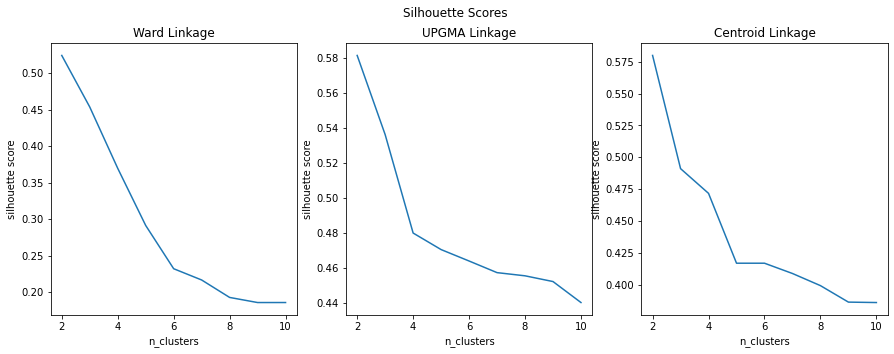

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(*zip(*silhouette_scores_ward))
plt.title("Ward Linkage")
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")

plt.subplot(1,3,2)
plt.plot(*zip(*silhouette_scores_upgma))
plt.title("UPGMA Linkage")
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")

plt.subplot(1,3,3)
plt.plot(*zip(*silhouette_scores_centroid))
plt.title("Centroid Linkage")
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")

plt.suptitle("Silhouette Scores")
plt.savefig("silhouette_scores_hc.png")

In [20]:
db_scores_ward = [(n,davies_bouldin_score(df_genes_norm,preds)) for n, preds in zip(range(2,11), genehclusters_ward)]
db_scores_upgma = [(n,davies_bouldin_score(df_genes_norm,preds)) for n, preds in zip(range(2,11), genehclusters_upgma)]
db_scores_centroid = [(n,davies_bouldin_score(df_genes_norm,preds)) for n, preds in zip(range(2,11), genehclusters_centroid)]

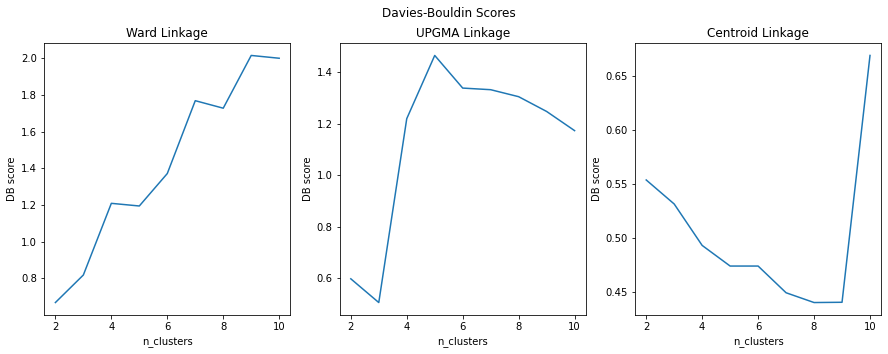

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(*zip(*db_scores_ward))
plt.title("Ward Linkage")
plt.xlabel("n_clusters")
plt.ylabel("DB score")

plt.subplot(1,3,2)
plt.plot(*zip(*db_scores_upgma))
plt.title("UPGMA Linkage")
plt.xlabel("n_clusters")
plt.ylabel("DB score")

plt.subplot(1,3,3)
plt.plot(*zip(*db_scores_centroid))
plt.title("Centroid Linkage")
plt.xlabel("n_clusters")
plt.ylabel("DB score")

plt.suptitle("Davies-Bouldin Scores")
plt.savefig("db_scores_hc.png")

### Analysis

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In the above graphs, silhouette value for all 3 linkages drop monotonously with increasing the number of clusters, with highest score for 2 clusters, 3 being the 2nd highest, 4 being the 3rd highest and so on. One would concur that the optimal number of clusters should be 2.

Let us also look at Davies-Bouldin Scores

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In the above graphs, for ward linkage, the minimum DBI is for 2 clusters. For UPGMA, interestingly, the score is mimimum for 3 clusters and not 2. And for centroid linkage the score is minimum for 9 clusters. But for 9 clusters, silhouette score is pretty low for centroid linkage, whereas it's high for 3 clusters in UPGMA linkage. So it seems like UPGMA with 3 clusters is the optimum strategy for clustering. 

Note: Eisen et al. first applied the agglomerative algorithm called UPGMA in literature. Eisen’s method is much favored by many biologists and has become the most widely-used tool in gene expression data analysis, so there's evidence for meaningful clustering using this method. 


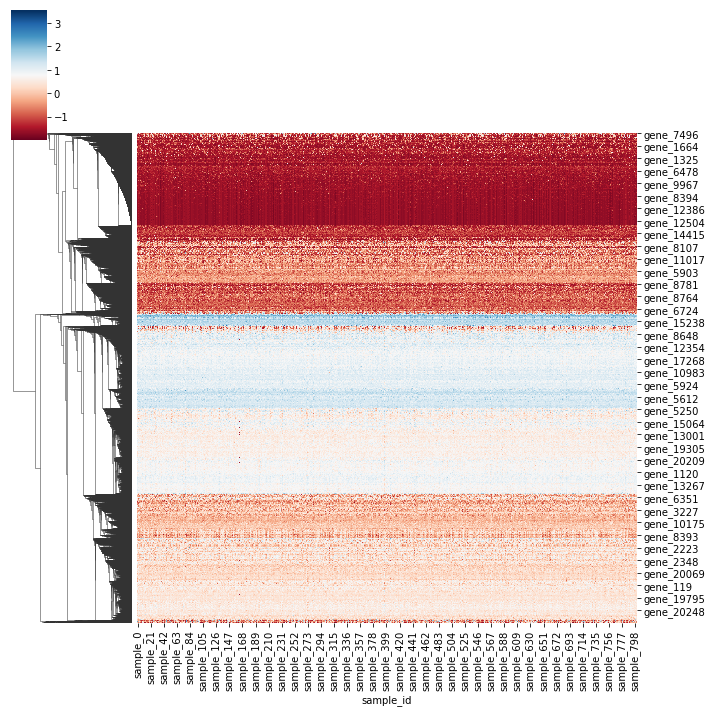

In [225]:
sns.clustermap(df_genes_norm, col_cluster=False, row_linkage=gene_linkage_upgma,cmap = 'RdBu' )

## K-Means Clustering

In [211]:
from sklearn.cluster import KMeans

In [212]:
geneclusters_km = []
inertia = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df_genes_norm)
    geneclusters_km.append(km.labels_)
    inertia.append((i,km.inertia_))

In [213]:
db_scores_km = [(n,davies_bouldin_score(df_genes_norm,preds)) for n, preds in zip(range(2,11), geneclusters_km)]
s_scores_km = [(n,silhouette_score(df_genes_norm,preds)) for n, preds in zip(range(2,11), geneclusters_km)]

Text(0, 0.5, 'silhouette score')

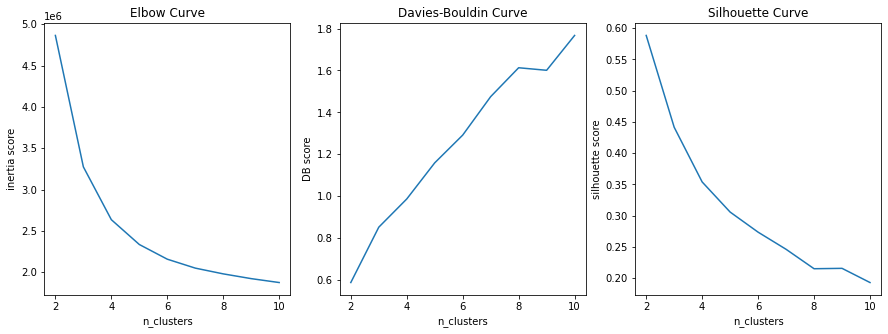

In [223]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(*zip(*inertia))
plt.title("Elbow Curve")
plt.xlabel("n_clusters")
plt.ylabel("inertia score") 

plt.subplot(1,3,2)
plt.plot(*zip(*db_scores_km))
plt.title("Davies-Bouldin Curve")
plt.xlabel("n_clusters")
plt.ylabel("DB score") 

plt.subplot(1,3,3)
plt.plot(*zip(*s_scores_km))
plt.title("Silhouette Curve")
plt.xlabel("n_clusters")
plt.ylabel("silhouette score") 


# Genes whose expression values are similar across samples of each cancer type 

In [177]:
df2 = df.copy()
df2.set_index('sample_id', inplace = True)

In [190]:
BRCA = (df2[df2.Class==0]).drop(columns=['Class'])
KIRC = (df2[df2.Class==1]).drop(columns=['Class'])
LUAD = (df2[df2.Class==2]).drop(columns=['Class'])
PRAD = (df2[df2.Class==3]).drop(columns=['Class'])
COAD = (df2[df2.Class==4]).drop(columns=['Class'])

In [191]:
BRCAT = BRCA.T
KIRCT = KIRC.T
LUADT = LUAD.T
PRADT = PRAD.T
COADT = COAD.T

In [192]:
def removegeneswithzerostd(gendf):
    i = gendf.std()[gendf.std()==0].index.to_list()
    return gendf.drop(columns=i)

In [193]:
BRCAT = removegeneswithzerostd(BRCAT)
KIRCT = removegeneswithzerostd(KIRCT)
LUADT = removegeneswithzerostd(LUADT)
PRADT = removegeneswithzerostd(PRADT)
COADT = removegeneswithzerostd(COADT)

In [194]:
BRCAT = (BRCAT - BRCAT.mean()/BRCAT.std())
KIRCT = (KIRCT - KIRCT.mean()/KIRCT.std())
LUADT = (LUADT - LUADT.mean()/LUADT.std())
PRADT = (PRADT - PRADT.mean()/PRADT.std())
COADT = (COADT - COADT.mean()/COADT.std())

In [140]:
def getClusters(dfh, linkage_type = 'centroid'):
    
    """
    **************************************************
    
    Function to get cluster labels based on provided hierarchical clustering method 
    
    params:
    
    dfh: dataframe which is to be clustered
    
    linkage: can be either 'centroid' or 'UPGMA'
    
    
    """
    
    dist = pdist(dfh, metric='euclidean')
    if linkage_type=='UPGMA': 
        linkage = average(dist)
    else:
        linkage = centroid(dist) 
    genehclusters = [fcluster(linkage,t=i,criterion='maxclust') for i in range(2,11)]
    return genehclusters, linkage

In [149]:
def plotDBCurve(dfh, cluster_labels, linkage):
    db_scores = [(n,davies_bouldin_score(dfh,preds)) for n, preds in zip(range(2,11), cluster_labels)]
    plt.plot(*zip(*db_scores))
    plt.title(linkage)
    plt.xlabel("n_clusters")
    plt.ylabel("DB score") 

In [150]:
def plotsilhouetteCurve(dfh,cluster_labels, linkage):
    s_scores = [(n,silhouette_score(dfh,preds)) for n, preds in zip(range(2,11), cluster_labels)]
    plt.plot(*zip(*s_scores))
    plt.title(linkage)
    plt.xlabel("n_clusters")
    plt.ylabel("silhouette score") 

In [155]:
def performKmeans(dfh):
    genehclusters = []
    inertia = []
    for i in range(2,11):
        km = KMeans(n_clusters=i)
        km.fit(dfh)
        genehclusters.append(km.labels_)
        inertia.append((i,km.inertia_))
    
    return genehclusters, inertia    
    

In [160]:
def plotelbow(inertia):
    plt.plot(*zip(*inertia))
    plt.title("Elbow Curve")
    plt.xlabel("n_clusters")
    plt.ylabel("inertia score") 

In [196]:
a,b= performKmeans(BRCAT)

In [199]:
BRCAT_centroid, BRCAT_link_centroid = getClusters(BRCAT)
BRCAT_upgma, BRCAT_link_avg = getClusters(BRCAT, "UPGMA")
BRCAT_kmeans, BRCAT_inertia = performKmeans(BRCAT)

In [197]:

KIRCT_centroid, KIRCT_link_centroid = getClusters(KIRCT)
KIRCT_upgma, KIRCT_link_avg = getClusters(KIRCT, "UPGMA")
KIRCT_kmeans, KIRCT_inertia = performKmeans(KIRCT)


LUADT_centroid, LUADT_link_centroid = getClusters(LUADT)
LUADT_upgma, LUADT_link_avg = getClusters(LUADT, "UPGMA")
LUADT_kmeans, LUADT_inertia = performKmeans(LUADT)


PRADT_centroid, PRADT_link_centroid = getClusters(PRADT)
PRADT_upgma, PRADT_link_avg = getClusters(PRADT, "UPGMA")
PRADT_kmeans, PRADT_inertia = performKmeans(PRADT)


COADT_centroid, COADT_link_centroid = getClusters(COADT)
COADT_upgma, COADT_link_avg = getClusters(COADT, "UPGMA")
COADT_kmeans, COADT_inertia = performKmeans(COADT)

## Clustering BRCA (Breast Cancer)

### Hierarchical Clustering

Text(0.5, 0.98, 'Clustering BRCA')

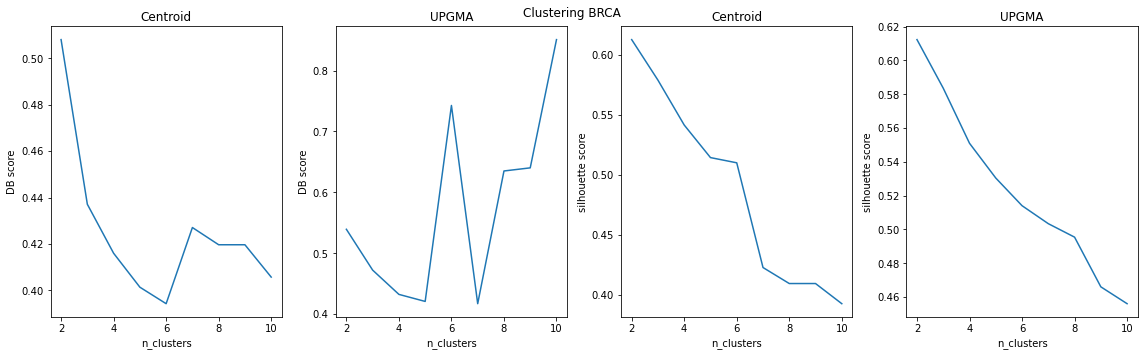

In [200]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plotDBCurve(BRCAT, BRCAT_centroid, "Centroid")
plt.subplot(1,4,2)
plotDBCurve(BRCAT, BRCAT_upgma, "UPGMA")
plt.subplot(1,4,3)
plotsilhouetteCurve(BRCAT, BRCAT_centroid, "Centroid")
plt.subplot(1,4,4)
plotsilhouetteCurve(BRCAT, BRCAT_upgma, "UPGMA")
plt.tight_layout()
plt.suptitle("Clustering BRCA")

### KMeans Clustering

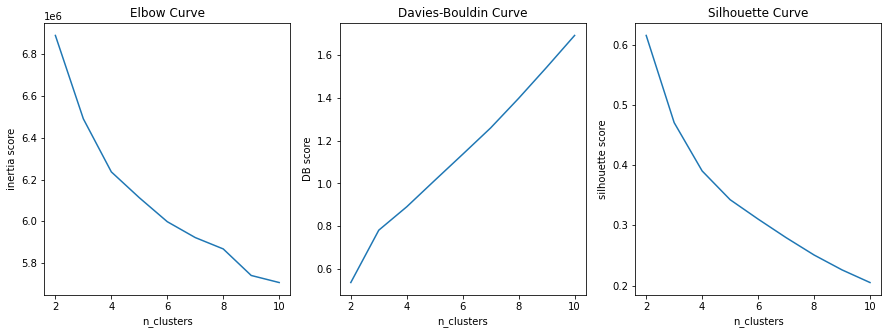

In [203]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plotelbow(inertia)
plt.subplot(1,3,2)
plotDBCurve(BRCAT,BRCAT_kmeans,"Davies-Bouldin Curve")
plt.subplot(1,3,3)
plotsilhouetteCurve(BRCAT,BRCAT_kmeans,"Silhouette Curve")

**KMeans doesn't provide any meaningful clustering. In Hierarchical Clustering Centroid Linkage with 6 clusters gives minimum DB score and has also high silhouette score. So optimal number of clusters in Breast Cancer is 6, optimum strategy - Hierarchical clustering with centroid linkage**

## Clustering KIRC (Kidney Renal Cancer)

### Hierarchical Clustering

Text(0.5, 0.98, 'Clustering KIRC')

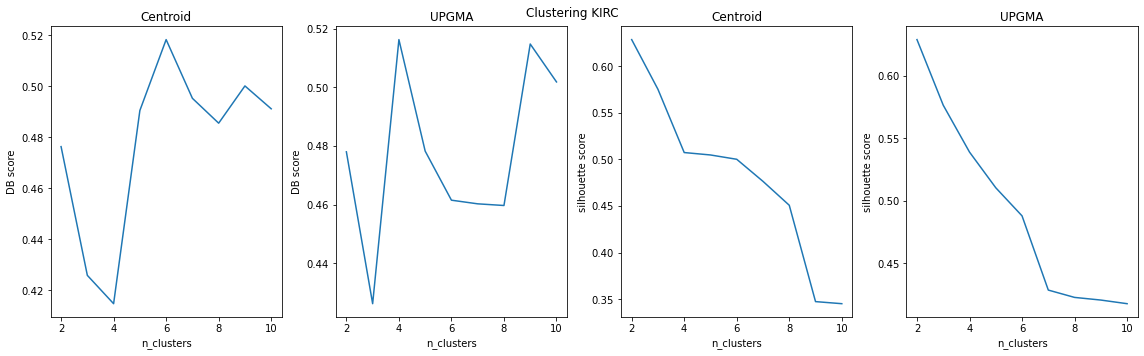

In [202]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plotDBCurve(KIRCT, KIRCT_centroid, "Centroid")
plt.subplot(1,4,2)
plotDBCurve(KIRCT, KIRCT_upgma, "UPGMA")
plt.subplot(1,4,3)
plotsilhouetteCurve(KIRCT, KIRCT_centroid, "Centroid")
plt.subplot(1,4,4)
plotsilhouetteCurve(KIRCT, KIRCT_upgma, "UPGMA")
plt.tight_layout()
plt.suptitle("Clustering KIRC")

### KMeans Clustering

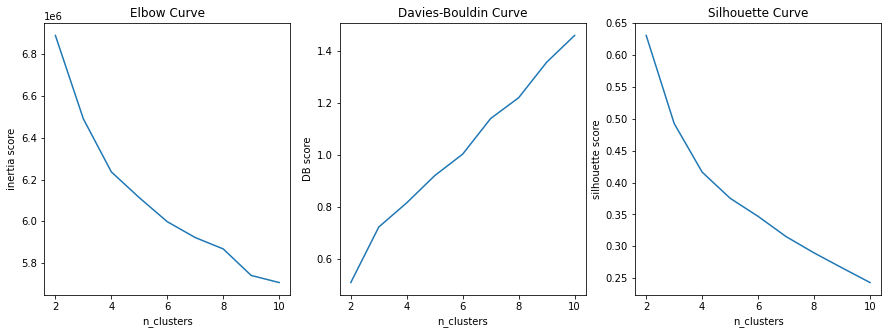

In [204]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plotelbow(inertia)
plt.subplot(1,3,2)
plotDBCurve(KIRCT,KIRCT_kmeans,"Davies-Bouldin Curve")
plt.subplot(1,3,3)
plotsilhouetteCurve(KIRCT,KIRCT_kmeans,"Silhouette Curve")

**KMeans doesn't provide any meaningful clustering. In Hierarchical clustering, DB score is minimum for centroid linkage with 4 clusters and also has a high silhouette score. So optimal number of clusters in Kidney Cancer is 4, optimum strategy - Hierarchical clustering with centroid linkage**

## Clustering LUAD (Lung Cancer)

### Hierarchical Clustering

Text(0.5, 0.98, 'Clustering LUAD')

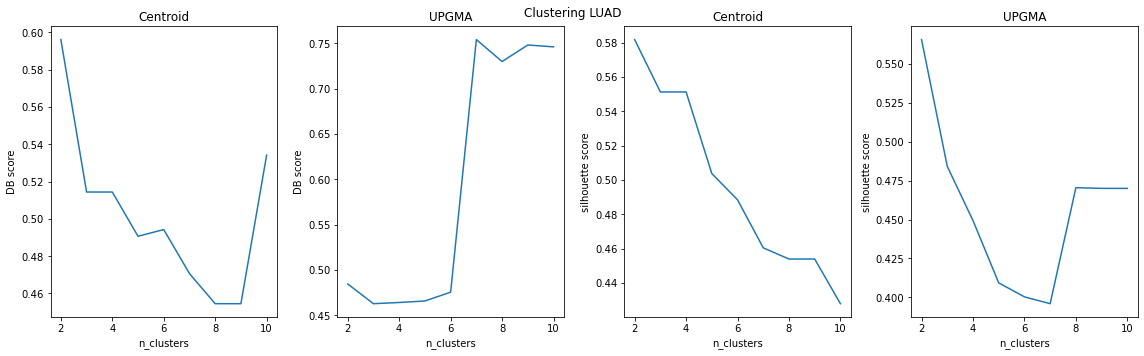

In [205]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plotDBCurve(LUADT, LUADT_centroid, "Centroid")
plt.subplot(1,4,2)
plotDBCurve(LUADT, LUADT_upgma, "UPGMA")
plt.subplot(1,4,3)
plotsilhouetteCurve(LUADT, LUADT_centroid, "Centroid")
plt.subplot(1,4,4)
plotsilhouetteCurve(LUADT, LUADT_upgma, "UPGMA")
plt.tight_layout()
plt.suptitle("Clustering LUAD")

### KMeans Clustering

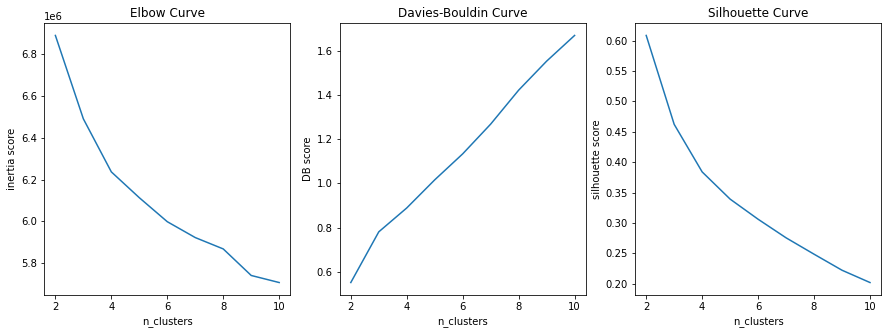

In [206]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plotelbow(inertia)
plt.subplot(1,3,2)
plotDBCurve(LUADT,LUADT_kmeans,"Davies-Bouldin Curve")
plt.subplot(1,3,3)
plotsilhouetteCurve(LUADT,LUADT_kmeans,"Silhouette Curve")

**KMeans doesn't provide any meaningful clustering. In Hierarchical clustering, UPGMA Linkage with 3 clusters and Centroid linkage with 8 and 9 clusters give minimum DB scores, however only UPGMA linkage with 3 clusters has a high silhouette score. So optimal number of clusters in Lung Cancer is 3, optimum strategy - Hierarchical clustering with UPGMA linkage** 

## Clustering PRAD (Prostrate Cancer)

### Hierarchical Clustering

Text(0.5, 0.98, 'Clustering PRAD')

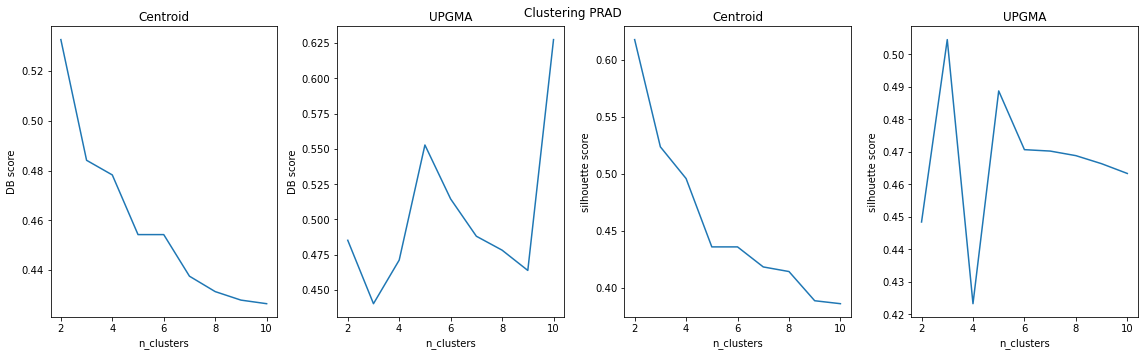

In [207]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plotDBCurve(PRADT, PRADT_centroid, "Centroid")
plt.subplot(1,4,2)
plotDBCurve(PRADT, PRADT_upgma, "UPGMA")
plt.subplot(1,4,3)
plotsilhouetteCurve(PRADT, PRADT_centroid, "Centroid")
plt.subplot(1,4,4)
plotsilhouetteCurve(PRADT, PRADT_upgma, "UPGMA")
plt.tight_layout()
plt.suptitle("Clustering PRAD")

### KMeans Clustering

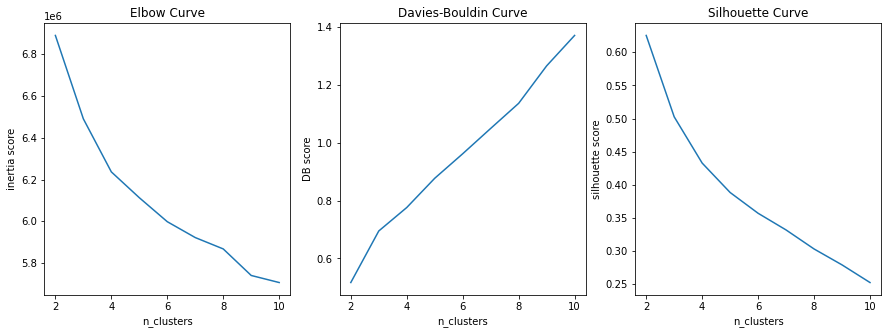

In [208]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plotelbow(inertia)
plt.subplot(1,3,2)
plotDBCurve(PRADT,PRADT_kmeans,"Davies-Bouldin Curve")
plt.subplot(1,3,3)
plotsilhouetteCurve(PRADT,PRADT_kmeans,"Silhouette Curve")

**KMeans doesn't provide any meaningful clustering. In Hierarchical clustering Only UPGMA linkage with 3 clusters gives a minimum DB score, and it also has a high silhouette score. So optimal number of clusters in Prostrate Cancer is 3, optimum strategy - Hierarchical clustering with UPGMA linkage** 

## Clustering COAD (Colon Cancer)

### Hierarchical Clustering

Text(0.5, 0.98, 'Clustering COAD')

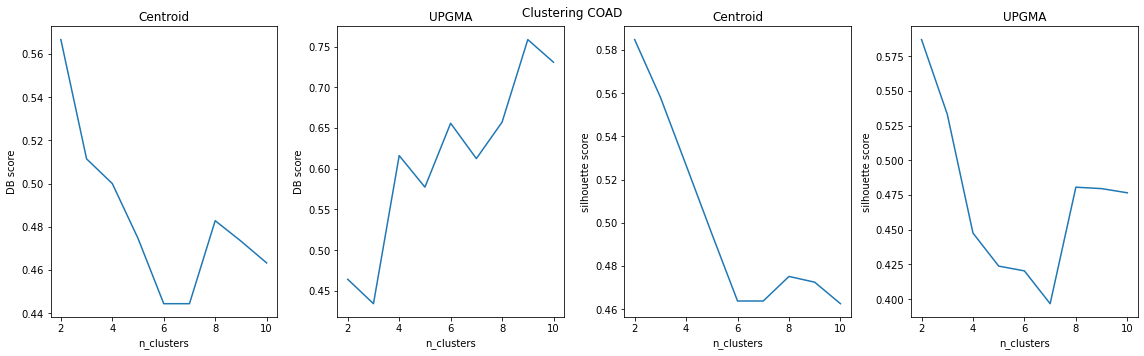

In [210]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plotDBCurve(COADT, COADT_centroid, "Centroid")
plt.subplot(1,4,2)
plotDBCurve(COADT, COADT_upgma, "UPGMA")
plt.subplot(1,4,3)
plotsilhouetteCurve(COADT, COADT_centroid, "Centroid")
plt.subplot(1,4,4)
plotsilhouetteCurve(COADT, COADT_upgma, "UPGMA")
plt.tight_layout()
plt.suptitle("Clustering COAD")

### KMeans Clustering

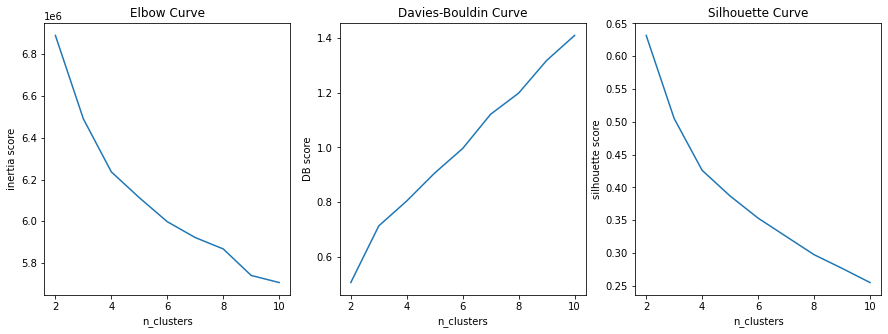

In [209]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plotelbow(inertia)
plt.subplot(1,3,2)
plotDBCurve(COADT,COADT_kmeans,"Davies-Bouldin Curve")
plt.subplot(1,3,3)
plotsilhouetteCurve(COADT,COADT_kmeans,"Silhouette Curve")

**KMeans doesn't provide any meaningful clustering. In Hierarchical clustering UPGMA linkage with 3 clusters gives a minimum DB score, and it also has a high silhouette score. So optimal number of clusters in Colon Cancer is 3, optimum strategy - Hierarchical clustering with UPGMA linkage**